# Определение возраста покупателей

    Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

    Необходимо построить модель, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста.

   План работ:

- Провести исследовательский анализ набора фотографий.
- Подготовить данные к обучению.
- Обучить нейронную сеть и рассчитать её качество.
```
Описание данных
Данные взяты с сайта ChaLearn Looking at People. Они находятся в папке /datasets/faces/.
В нашем распоряжении одна папка со всеми изображениями (/final_files) и csv-файл labels.csv с двумя колонками: file_name и real_age.


## Исследовательский анализ данных

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels .info()
labels.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


In [3]:
#размер выборки
labels.shape

(7591, 2)

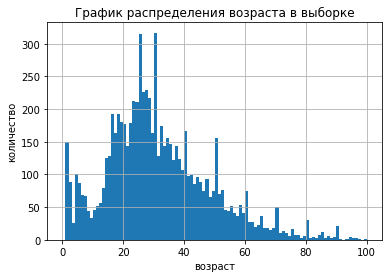

In [4]:
#гистограмма распределения возраста
labels['real_age'].hist(bins=100, range=(0,100))
plt.title('График распределения возраста в выборке')
plt.xlabel('возраст')
plt.ylabel('количество')
plt.show()

В библиотеке Keras есть удобный загрузчик ImageDataGenerator (англ. «генератор данных изображений»):
Из фотографий в папках класс ImageDataGenerator формирует батчи с изображениями и метками классов.

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
gen_flow = datagen.flow_from_dataframe(dataframe=labels, 
    directory='/datasets/faces/final_files/', 
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=16, class_mode='raw', seed=1234)

Found 7591 validated image filenames.


Поясним некоторые аргументы:

target_size=(224, 224) — аргумент с шириной и высотой, к которым будут приводиться изображения. В папках могут лежать изображения разного размера, а нейронным сетям нужно, чтобы все изображения были одинаковые.

batch_size=16 — количество изображений в батче. Чем больше изображений, тем лучше обучится сеть. Много фотографий в памяти GPU не поместится, поэтому 16 — это золотая середина, с которой можно стартовать.

сlass_mode='raw' — аргумент, который указывает тип выдачи метки классов. пустой массив значений в y_colстолбцах.


Получили объект, у которого пары «картинки — метки» можно получить функцией next() (англ. «следующий»):


In [6]:
features, target = next(gen_flow)
print(features.shape) 

(16, 224, 224, 3)


Получили признаки — четырёхмерный тензор, в котором 16 изображений размером 224x224 с тремя цветовыми каналами.

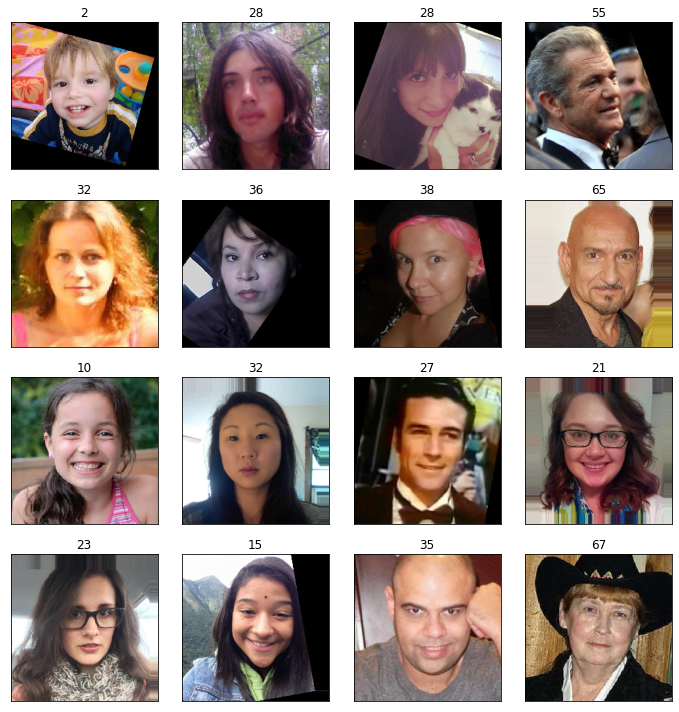

In [7]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
	# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title(target[i])

In [8]:
#напечатаем на экране 10–15 фотографий и посмотрим, как устроен датасет.
def image(number):
    return print(plt.imshow(features[number])), print(target[number])

AxesImage(54,36;334.8x217.44)
2


(None, None)

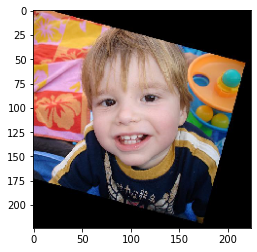

In [9]:
image(0)

AxesImage(54,36;334.8x217.44)
28


(None, None)

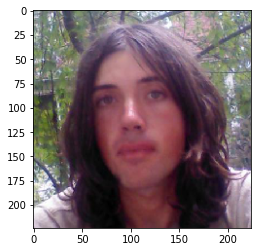

In [10]:
image(1)

AxesImage(54,36;334.8x217.44)
28


(None, None)

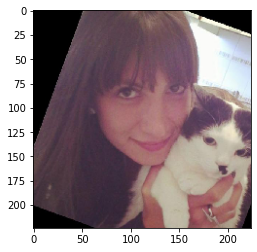

In [11]:
image(2)

AxesImage(54,36;334.8x217.44)
55


(None, None)

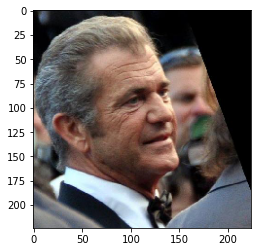

In [12]:
image(3)

AxesImage(54,36;334.8x217.44)
32


(None, None)

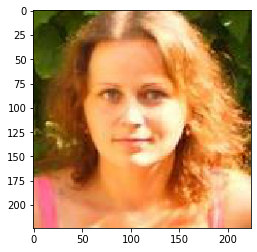

In [13]:
image(4)

AxesImage(54,36;334.8x217.44)
36


(None, None)

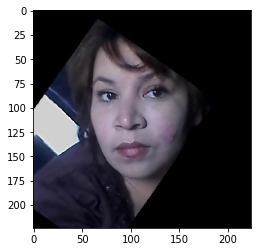

In [14]:
image(5)

AxesImage(54,36;334.8x217.44)
38


(None, None)

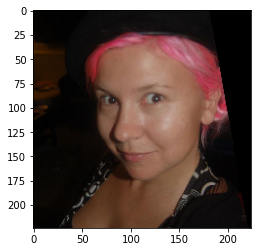

In [15]:
image(6)

AxesImage(54,36;334.8x217.44)
65


(None, None)

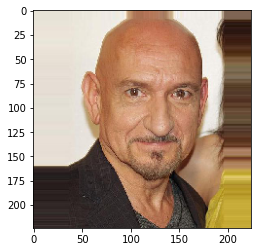

In [16]:
image(7)

AxesImage(54,36;334.8x217.44)
10


(None, None)

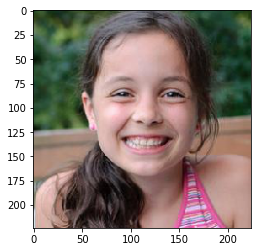

In [17]:
image(8)

AxesImage(54,36;334.8x217.44)
32


(None, None)

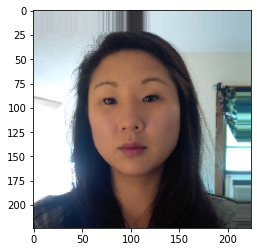

In [18]:
image(9)

AxesImage(54,36;334.8x217.44)
67


(None, None)

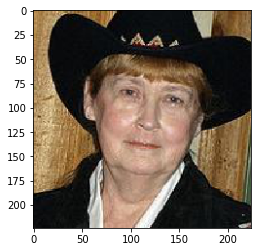

In [19]:
image(15)

 Файл labels.csv таблица из  7591 строк и двумя колонками: file_name и real_age, данные немного смещены влево, аномальных значений нет.
 С помощью загрузчика ImageDataGenerator приведем озображения к одному размеру, много фотографий в памяти GPU не поместится, поэтому разобем на батчи с количеством изображений - 16. Загруженные изображения соотвествуют указанному возрасту.
 



In [20]:
labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

Представленная выборка содержит 7591 фотографий людей разного возраста. Минимальный возраст 1 год, максимальный 100 лет. График распеределения возраста смещен влево, больше всего данных для лиц от 17 до  40 лет, наблюдается всплески в юбилейные даты, что возможно свидетельствует о некачественной разметке и может повлиять на результат обучения модели.  Выведенные на экран фотографии лиц крупным планом, представлены как в черно-белом, так и цветном варианте. Но на фото присутствуют посторонние предметы, животные и другие люди на заднем плане, некоторые фотографии повернуты на 30-40 градусов, что тоже неблагопрятно для обучения модели.

Так и не пойму, как определить достаточно данных или нет, только если опытным путем..
 У нас задача регрессии, ожидаемое число в диапазоне от 0 до 100, у нас 7591 объектов, которые поделим на обучающую(5700) и валидационную(1891) конечно чем больше выборка тем лучше обучится модель, но когда данных слишком много это затратно, опять же делим выборку на части и увеличиваем количество эпох, чем компенсируем недостаток данных. Как все-таки определить достаточный размер обучающей выборки?

## Обучение модели

Перенесем код обучения модели и её результат вывода на экран.

Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке

```
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np
import pandas as pd
```
```
def load_train(path):

    labels = pd.read_csv(path +'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(dataframe=labels, 
    directory=path + '/final_files', 
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224), subset='training',
    batch_size=16, class_mode='raw', seed=1234)

    return train_gen_flow
 
``` 
```
def load_test(path):

    labels = pd.read_csv(path +'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(dataframe=labels, 
    directory=path + '/final_files', 
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224), subset='validation',
    batch_size=16, class_mode='raw', seed=1234)

    return test_gen_flow



def create_model(input_shape):
    
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    include_top=False) 
   
    model = Sequential()
    optimizer = Adam(lr=0.0001)
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=5,
               steps_per_epoch=None, validation_steps=None):
               
    model.fit(train_data, 
    validation_data=test_data,
    batch_size=batch_size, epochs=epochs,
    steps_per_epoch=steps_per_epoch,
       validation_steps=validation_steps,
       verbose=2, shuffle=True)

    return model 
```    

<font color='purple'>использовала бы horizontal_flip=True, но необходимое значение МАЕ получилось и без аугментации</font>


Результат вывода на экран:

```
Train for 356 steps, validate for 119 steps
Epoch 1/5
2022-09-12 14:51:21.650144: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-09-12 14:51:22.126070: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 61s - loss: 207.1765 - mae: 10.5491 - val_loss: 447.8828 - val_mae: 15.8171
Epoch 2/5
356/356 - 47s - loss: 69.9973 - mae: 6.4079 - val_loss: 160.5294 - val_mae: 9.5823
Epoch 3/5
356/356 - 64s - loss: 38.5380 - mae: 4.7590 - val_loss: 95.5901 - val_mae: 7.6837
Epoch 4/5
356/356 - 61s - loss: 22.8325 - mae: 3.7078 - val_loss: 74.3472 - val_mae: 6.4231
Epoch 5/5
356/356 - 56s - loss: 16.4542 - mae: 3.1256 - val_loss: 70.9597 - val_mae: 6.4099
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 11s - loss: 70.9597 - mae: 6.4099
Test MAE: 6.4099


```

## Анализ обученной модели

 Для определения возраста по фотографии предложена модель ResNet50 (50 количество слоев сети) без заморозки со следующими параметрами:
  - input_shape — размер входного изображения (224, 224, 3)
  -  weights = 'imagenet' - с инициализацией весов ImageNet (название большого датасета, на котором сеть обучалась классифицировать изображения на 1000 классов. Если обучение сети начать на ImageNet, а продолжить на нашей задаче, результат будет лучше, чем если обучать с нуля)
  - include_top=False - указание на то, что в конце архитектуры ResNet нет двух слоев: GlobalAveragePooling2D и Dense
  - batch_size=16
  Применили алгоритм Adam со скорость обучения learning rate=0,0001, GlobalAveragePooling2D и полносвязный слой с одним нейроном с функцией активацией 'relu'.
  При количестве эпох равном 5 удалось добиться значения метрики МАЕ = 6,4 на валидационной выборке без применения аугментации к обучаеющему набору. Приэтом на обучающем датасете метрика МАЕ = 3,12, что говорит о переобучении модели.
  
  
 
 